In [4]:
import os
import zipfile

# Ganti dengan path ke folder dataset kamu
dataset_path = "MY_data"

# Cek isi folder dataset
if os.path.exists(dataset_path):
    print("Folder dataset ditemukan.")
    print("Isi folder:")
    print(os.listdir(dataset_path))
else:
    print("Folder dataset tidak ditemukan.")


Folder dataset ditemukan.
Isi folder:
['predict', 'test', 'train']


In [6]:
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

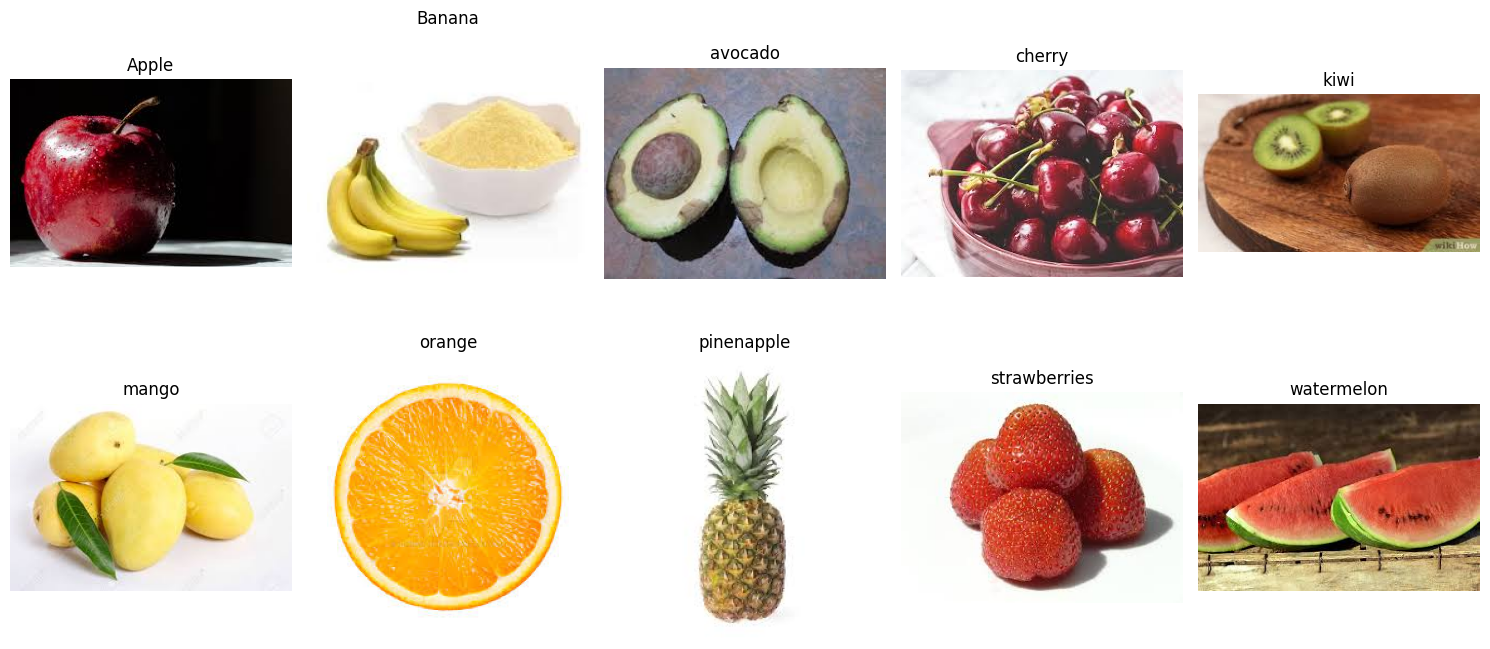

In [7]:
# Path ke folder dataset
dataset_path = 'MY_data/train'  # Ganti dengan path Anda

# Ambil satu gambar per kelas
plt.figure(figsize=(15, 10))
for i, class_name in enumerate(sorted(os.listdir(dataset_path))):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        # Ambil gambar pertama di setiap folder kelas
        img_file = os.listdir(class_path)[0]
        img_path = os.path.join(class_path, img_file)

        # Tampilkan gambar
        img = Image.open(img_path)
        plt.subplot(3, 5, i+1)  # 3 baris x 5 kolom
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Pra-pemrosesan dan augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalisasi pixel [0, 1]
    rotation_range=20,     # Augmentasi: rotasi gambar
    width_shift_range=0.2, # Augmentasi: geser horizontal
    height_shift_range=0.2, # Augmentasi: geser vertikal
    validation_split=0.2   # 20% data untuk validasi
)

# Generator untuk data latih
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  # Resize gambar ke 150x150
    batch_size=32,
    class_mode='categorical',
    subset='training'       # Subset untuk training
)

# Generator untuk data validasi
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'     # Subset untuk validation
)

Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.


In [9]:
model = Sequential([
    # Layer konvolusi dan pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Layer klasifikasi
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[checkpoint]
)

Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2035 - loss: 2.1262

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.2045 - loss: 2.1233 - val_accuracy: 0.2957 - val_loss: 1.7286
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 55s 938ms/step - accuracy: 0.3600 - loss: 1.6789 - val_accuracy: 0.4022 - val_loss: 1.5908
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 54s 931ms/step - accuracy: 0.4253 - loss: 1.5252 - val_accuracy: 0.4283 - val_loss: 1.4808
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 54s 921ms/step - accuracy: 0.4334 - loss: 1.4659 - val_accuracy: 0.4826 - val_loss: 1.4291
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 278s 5s/step - accuracy: 0.4614 - loss: 1.3853 - val_accuracy: 0.4587 - val_loss: 1.3892
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 52s 888ms/step - accuracy: 0.5198 - loss: 1.2871 - val_accuracy: 0.5761 - val_loss: 1.2100
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 85s 934ms/step - accuracy: 0.5633 - loss: 1.1808 - val_accuracy: 0.5326 - val_loss: 1.2607
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 52s 896ms/step - accuracy: 0.5569 - loss: 1.1874 - val_accuracy: 0.5891 - v

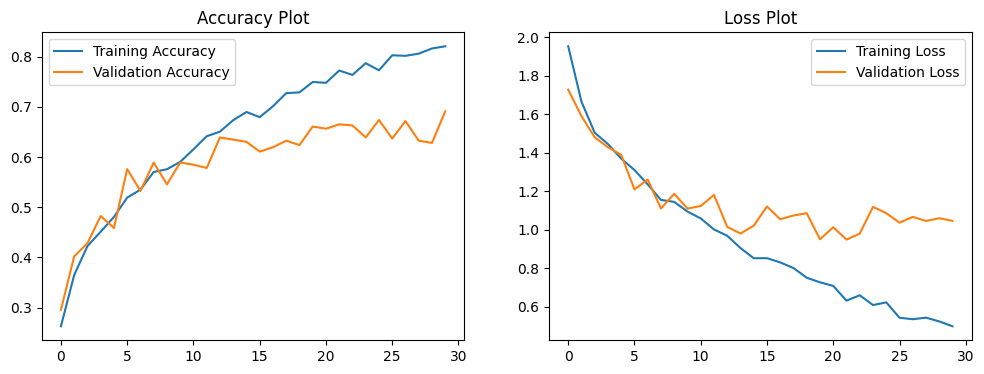

In [13]:
# Plot akurasi training dan validation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Plot')

# Plot loss training dan validation
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Plot')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


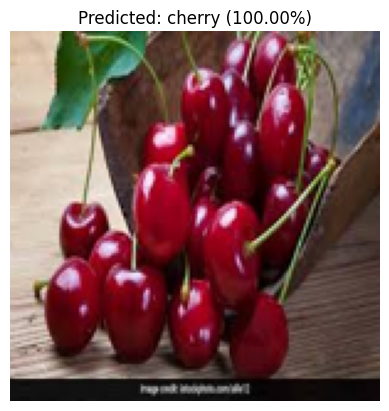

In [16]:
def predict_image(img_path, model):
    img = Image.open(img_path).resize((150, 150))
    img_array = np.array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambah dimensi batch

    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    class_name = list(train_generator.class_indices.keys())[class_idx]
    confidence = pred[0][class_idx] * 100

    plt.imshow(img)
    plt.title(f"Predicted: {class_name} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# Contoh penggunaan
predict_image('MY_data/predict/65.jpeg', model)